## Final ML Project 

### Group Members: Ruobing Wan, Xiao Fang, Zhuoyang Wu

### Import Dataset

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()
#No null values detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Preprocessing

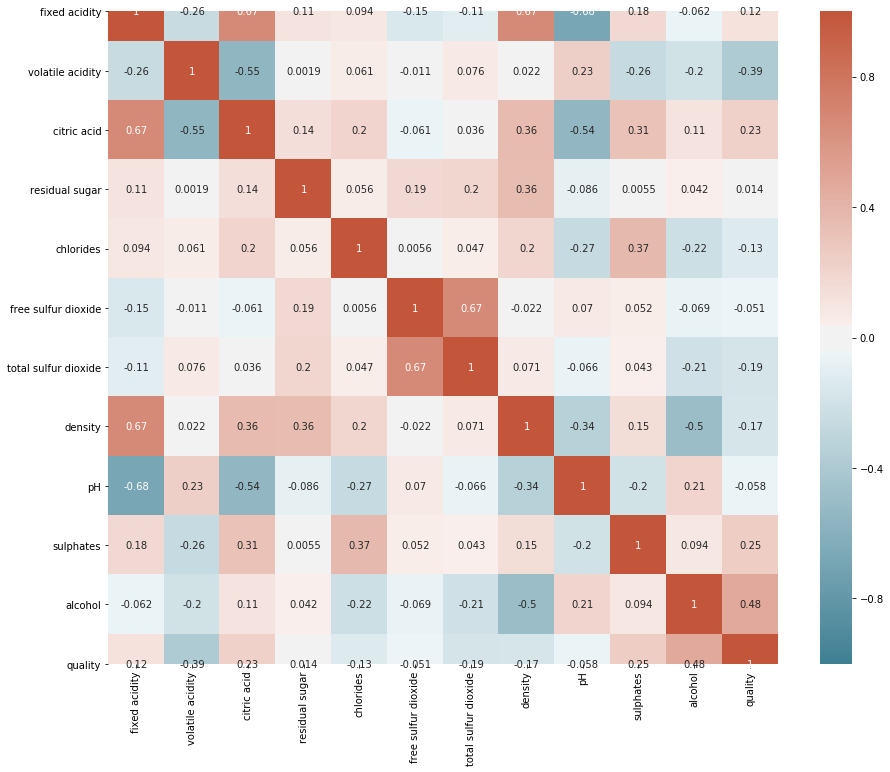

In [4]:
corrMatrix = wine.corr()
matrix = np.triu(corrMatrix)
sns.heatmap(corrMatrix, vmin = -1, vmax = 1, center = 0, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.gcf().set_size_inches(15,12)

In [5]:
corr_with_target = wine[wine.columns[1:]].corr()['quality'][:].sort_values(kind="quicksort")
corr_with_target

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

### Data Exploration Part is on Tableau

### Regression

Regression Model Plan to Use:
1. Linear Regression 
2. Lasso Regression (can be applied because there are a small number of significant parameters and the others are close to zero)
3. Ridge Regression(can be applied because highly correlated variables exist)
4. Random Forest(RandomForestRegressor)
5. Decision Tree(DecisionTreeRegressor
6. Knn(KNeighboursRegressor)


### Train/Test Split

In [6]:
X = wine.iloc[:, :-1].values
y = wine['quality']

In [7]:
#Split the dataset to traning and testing (70/30) and check the shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 1)
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)

X_train shape: (1119, 11) | X_test shape: (480, 11)


### 1. Linear Regression

In [8]:
linreg = LinearRegression().fit(X, y)

In [9]:
linreg.coef_, linreg.intercept_

(array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
        -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
        -4.13653144e-01,  9.16334413e-01,  2.76197699e-01]),
 21.965208449448177)

In [10]:
print("The mean accuracy on the traning data is", linreg.score(X_train, y_train))
print("The mean accuracy on the testing data is", linreg.score(X_test, y_test))

The mean accuracy on the traning data is 0.3716321196160003
The mean accuracy on the testing data is 0.3289239282242903


In [11]:
lin_pred = linreg.predict(X_test)

In [12]:
#R squared
print("The R squared for the linear model is:", r2_score(y_test, lin_pred))

The R squared for the linear model is: 0.3289239282242903


#### Cross-validation

In [13]:
cv_lineg = cross_val_predict(linreg, X_train, y_train, cv = 10)

In [14]:
#R squared
print("The R squared for the linear model is:", np.average(cross_val_score(linreg, X_train, y_train, cv = 10)))

The R squared for the linear model is: 0.3456224150116199


### 2. Lasso Regression

In [15]:
lasreg = Lasso(alpha = 1.0)
lasreg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
print("The mean accuracy on the traning data is", lasreg.score(X_train, y_train))
print("The mean accuracy on the testing data is", lasreg.score(X_test, y_test))

The mean accuracy on the traning data is 0.03547366391248685
The mean accuracy on the testing data is 0.02224756258045202


In [17]:
las_pred = lasreg.predict(X_test)

In [18]:
#R squared
print("The R squared for the Lasso model is:", r2_score(y_test, las_pred))

The R squared for the Lasso model is: 0.02224756258045202


#### Tune Parameters

In [19]:
alpha = 10**np.linspace(6,-2,50)*0.5
lasso_cv = LassoCV(alphas=alpha, max_iter=100000, normalize=True)
lasso_model = lasso_cv.fit(X_train, y_train)
lasso_r2 = lasso_cv.score(X_train, y_train)
print("The best alpha value for Lasso regression is:", lasso_model.alpha_)

The best alpha value for Lasso regression is: 0.005


C:\Users\Zhuoyang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [20]:
lasreg2 = Lasso(alpha=lasso_model.alpha_)

In [21]:
lasreg2.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print("The mean accuracy on the traning data is", lasreg2.score(X_train, y_train))
print("The mean accuracy on the testing data is", lasreg2.score(X_test, y_test))

The mean accuracy on the traning data is 0.3564588563472145
The mean accuracy on the testing data is 0.3104625108858078


In [23]:
las_pred2 = lasreg2.predict(X_test)

In [24]:
#R squared
print("The R squared for the Tuned Lasso model is:", r2_score(y_test, las_pred2))

The R squared for the Tuned Lasso model is: 0.3104625108858078


#### Cross Validation

In [25]:
cv_lasso = LassoCV(alphas=alpha, cv = 10, random_state = None, normalize = True).fit(X_train, y_train)

In [26]:
cv_lasso_pred = cv_lasso.predict(X_test)

In [27]:
#R squared
print("The R squared for the Lasso model is:", r2_score(y_test, cv_lasso_pred))

The R squared for the Lasso model is: 0.23733002149228088


### 3. Ridge Regression

In [28]:
ridreg = Ridge(alpha=1.0)
ridreg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
print("The mean accuracy on the traning data is", ridreg.score(X_train, y_train))
print("The mean accuracy on the testing data is", ridreg.score(X_test, y_test))

The mean accuracy on the traning data is 0.37115748296385653
The mean accuracy on the testing data is 0.32011505433220167


In [30]:
rid_pred = ridreg.predict(X_test)

In [31]:
#R squared
print("The R squared for the Ridge model is:", r2_score(y_test, rid_pred))

The R squared for the Ridge model is: 0.32011505433220167


#### Tune parameters

In [32]:
alpha = 10**np.linspace(6,-2,50)*0.5
ridge_cv = RidgeCV(alphas=alpha, normalize=True)
ridge_model = ridge_cv.fit(X_train, y_train)
ridge_r2 = ridge_cv.score(X_train, y_train)
print("The best alpha value for Lasso regression is:", ridge_model.alpha_)

The best alpha value for Lasso regression is: 0.04770477381749972


In [33]:
ridreg2 = Ridge(ridge_model.alpha_)

In [34]:
ridreg2.fit(X_train, y_train)

Ridge(alpha=0.04770477381749972, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
print("The mean accuracy on the traning data is", ridreg2.score(X_train, y_train))
print("The mean accuracy on the testing data is", ridreg2.score(X_test, y_test))

The mean accuracy on the traning data is 0.3724026645481611
The mean accuracy on the testing data is 0.3205990015474819


In [36]:
rid_pred2 = ridreg2.predict(X_test)

In [37]:
#R squared
print("The R squared for the Tuned Ridge model is:", r2_score(y_test, rid_pred2))

The R squared for the Tuned Ridge model is: 0.3205990015474819


#### Cross Validation

In [38]:
cv_ridge = RidgeCV(alphas=alpha, cv = 10, normalize = True).fit(X_train, y_train)

In [39]:
cv_ridge_pred = cv_ridge.predict(X_test)

In [40]:
#R squared
print("The R squared for the model is:", r2_score(y_test, cv_ridge_pred))

The R squared for the model is: 0.32180224371573085


### 4. Random Forest Model

In [41]:
rf_model = RandomForestRegressor(random_state=42)

In [42]:
rf_model.fit(X_train, y_train)

C:\Users\Zhuoyang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [43]:
print("The mean accuracy on the traning data is", rf_model.score(X_train, y_train))
print("The mean accuracy on the testing data is", rf_model.score(X_test, y_test))

The mean accuracy on the traning data is 0.8973999957020776
The mean accuracy on the testing data is 0.44541791757885213


In [44]:
rf_pred = rf_model.predict(X_test)

In [45]:
print("The R squared score for Random Forest model:",r2_score(y_test, rf_pred))

The R squared score for Random Forest model: 0.4454179175788521


#### Tune Parameters & Grid Search with Cross Validation

In [46]:
#Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3, 4, 10, 50, 100, 200],
    'max_features': [2, 3, 'auto'],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2, 8, 10, 12],
    'n_estimators': [10, 100, 200, 300, 1000], 
    'random_state': [42, 50, 100, 200, 300]
}

In [47]:
rf_model2 = RandomForestRegressor()

In [48]:
grid_search = GridSearchCV(estimator = rf_model2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [49]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'random_state': 300}

In [50]:
rf_model3 = RandomForestRegressor(bootstrap = True, max_depth = 50, max_features = 3, min_samples_leaf = 1, 
                                  min_samples_split = 2, n_estimators = 1000, random_state = 300)
rf_model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=300, verbose=0,
                      warm_start=False)

In [51]:
print("The mean accuracy on the traning data is", rf_model3.score(X_train, y_train))
print("The mean accuracy on the testing data is", rf_model3.score(X_test, y_test))

The mean accuracy on the traning data is 0.9308651660179987
The mean accuracy on the testing data is 0.470629050637876


In [52]:
rf_pred2 = rf_model3.predict(X_test)

In [53]:
print("The R squared score for Tuned Random Forest model:",r2_score(y_test, rf_pred2))

The R squared score for Tuned Random Forest model: 0.47062905063787597


### 4. Decision Tree Model

In [54]:
dt_model = DecisionTreeRegressor(random_state=42)

In [55]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [56]:
print("The mean accuracy on the traning data is", dt_model.score(X_train, y_train))
print("The mean accuracy on the testing data is", dt_model.score(X_test, y_test))

The mean accuracy on the traning data is 1.0
The mean accuracy on the testing data is -0.00633953975939705


In [57]:
dt_pred = dt_model.predict(X_test)

In [58]:
print("The R squared for Decision Tree model:",r2_score(y_test, dt_pred))

The R squared for Decision Tree model: -0.00633953975939705


#### Tune Parameters & Grid Search with Cross Validation

In [59]:
#Source: https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
parameters={"splitter":["best","random"],
            "criterion":["mse"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
           'random_state': [42, 50, 100, 200, 300]}

In [60]:
dt_model2 = DecisionTreeRegressor()

In [61]:
dt_grid =  GridSearchCV(estimator = dt_model2, param_grid = parameters,
                                cv=3, verbose=2,  n_jobs = -1)
# Fit the grid search model
dt_grid.fit(X_train, y_train)
dt_grid.best_params_

Fitting 3 folds for each of 168000 candidates, totalling 504000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2308 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 10388 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 21708 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 36308 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 54108 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 75188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 99468 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 127028 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 157788 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 191828 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 229068 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 269588 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 313308 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Do

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 8,
 'min_weight_fraction_leaf': 0,
 'random_state': 50,
 'splitter': 'random'}

In [62]:
#random_state=42, max_depth=3, criterion='mse', splitter='best',min_samples_leaf=1
dt_model3 = DecisionTreeRegressor(max_depth = 7, max_features = 'auto', min_samples_leaf = 8, 
                                  min_weight_fraction_leaf = 0, random_state = 50, max_leaf_nodes = 40, 
                                  splitter ="random" , criterion="mse")
dt_model3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
                      max_leaf_nodes=40, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0,
                      presort=False, random_state=50, splitter='random')

In [63]:
print("The mean accuracy on the traning data is", dt_model3.score(X_train, y_train))
print("The mean accuracy on the testing data is", dt_model3.score(X_test, y_test))

The mean accuracy on the traning data is 0.4271501253304246
The mean accuracy on the testing data is 0.22979806503430936


In [64]:
dt_pred2 = dt_model3.predict(X_test)

In [65]:
print("The R squared score for Tuned Decision Tree model:",r2_score(y_test, dt_pred2))

The R squared score for Tuned Decision Tree model: 0.22979806503430933


### 5. Knn Model

#### Normalization

In [66]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test1 = pd.DataFrame(X_test_scaled)

In [67]:
knn_model = KNeighborsRegressor()

In [68]:
knn_model.fit(X_train1, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [69]:
print("The mean accuracy on the traning data is", knn_model.score(X_train1, y_train))
print("The mean accuracy on the testing data is", knn_model.score(X_test1, y_test))

The mean accuracy on the traning data is 0.5430024808563372
The mean accuracy on the testing data is 0.23928945810840707


In [70]:
knn_pred = knn_model.predict(X_test1)

In [71]:
print("The R squared for Knn Regression model:",r2_score(y_test, knn_pred))

The R squared for Knn Regression model: 0.23928945810840707


#### Tune Parameters & Grid Search with Cross Validation

In [72]:
# Source: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
# store rmse values for different k
rmse_val = []

for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train1, y_train) 
    knn_pred2 = model.predict(X_test) 
    error = np.sqrt(mean_squared_error(y_test,knn_pred2)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.5857437792194973
RMSE value for k=  2 is: 1.0779513749082872
RMSE value for k=  3 is: 0.9541575690978228
RMSE value for k=  4 is: 0.8641439646648391
RMSE value for k=  5 is: 0.8150664594579594
RMSE value for k=  6 is: 0.7962222726145052
RMSE value for k=  7 is: 0.7892776340892154
RMSE value for k=  8 is: 0.7949629839390846
RMSE value for k=  9 is: 0.7994017825077344
RMSE value for k=  10 is: 0.8056053624449131
RMSE value for k=  11 is: 0.8090079119841119
RMSE value for k=  12 is: 0.8145895495642326
RMSE value for k=  13 is: 0.8208482887933618
RMSE value for k=  14 is: 0.8237222118608465
RMSE value for k=  15 is: 0.8268693747884021
RMSE value for k=  16 is: 0.8250434016361402
RMSE value for k=  17 is: 0.8274503995909124
RMSE value for k=  18 is: 0.8267564542039579
RMSE value for k=  19 is: 0.8254451218117452
RMSE value for k=  20 is: 0.823458155180537


In [73]:
k_range = range(1, 21)
params = {'n_neighbors':k_range}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train1,y_train)
model.best_params_

{'n_neighbors': 20}

In [74]:
knn_model2 = KNeighborsRegressor(n_neighbors=20)
knn_model2.fit(X_train1, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [75]:
print("The mean accuracy on the traning data is", knn_model2.score(X_train1, y_train))
print("The mean accuracy on the testing data is", knn_model2.score(X_test1, y_test))

The mean accuracy on the traning data is 0.4064028657591683
The mean accuracy on the testing data is 0.2613758726672418


In [76]:
knn_pred3 = knn_model2.predict(X_test1)

In [77]:
print("The R squared for Tuned Knn Regression model:",r2_score(y_test,knn_pred3))

The R squared for Tuned Knn Regression model: 0.2613758726672418


### Regression Models Summary

In [78]:
# 1. Linear Regression
print("The R squared for the linear model is:", np.average(cross_val_score(linreg, X_train, y_train, cv = 10)))

# 2. Lasso Regression
print("The R squared for the Tuned Lasso model is:", r2_score(y_test, las_pred2))

# 3. Ridge Regression
#R squared
print("The R squared for the Tuned Ridge model is:", r2_score(y_test, rid_pred2))

# 4. Random Forest Regression
print("The R squared score for Tuned Random Forest model:",r2_score(y_test, rf_pred2))

# 5. Decision Tree Regression
print("The R squared score for Tuned Decision Tree model:",r2_score(y_test, dt_pred2))

# 6. Knn Regression
print("The R squared for Tuned Knn Regression model:",r2_score(y_test,knn_pred3))

The R squared for the linear model is: 0.3456224150116199
The R squared for the Tuned Lasso model is: 0.3104625108858078
The R squared for the Tuned Ridge model is: 0.3205990015474819
The R squared score for Tuned Random Forest model: 0.47062905063787597
The R squared score for Tuned Decision Tree model: 0.22979806503430933
The R squared for Tuned Knn Regression model: 0.2613758726672418


### It turns out that Random Forest Regression Model has the highest R score. 

### Feature Importance for Ranodm Forest Regression Model

In [79]:
column = []

for header in wine.columns:
    if header != "quality":
        column.append(header)
column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [80]:
importances = list(rf_model3.feature_importances_)

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(column, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.192
Variable: sulphates            Importance: 0.135
Variable: volatile acidity     Importance: 0.133
Variable: total sulfur dioxide Importance: 0.083
Variable: density              Importance: 0.081
Variable: chlorides            Importance: 0.074
Variable: citric acid          Importance: 0.07
Variable: fixed acidity        Importance: 0.065
Variable: pH                   Importance: 0.061
Variable: residual sugar       Importance: 0.055
Variable: free sulfur dioxide  Importance: 0.05


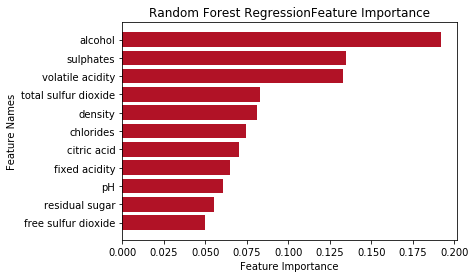

In [82]:
importance = rf_model3.feature_importances_
indices = np.argsort(importance)

plt.barh(range(len(indices)), importance[indices], color='#b11226', align='center')
plt.yticks(range(len(indices)), [column[i] for i in indices])
plt.title("Random Forest Regression" + 'Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()